<a href="https://colab.research.google.com/github/omidrezaasdev/House-Prices-EDA-Project/blob/main/HousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import pandas as pd
import os

train_file_path = '/content/drive/MyDrive/Colab Notebooks/Project/train.csv'

df_train = pd.read_csv(train_file_path)
print(df_train.head())

print(f"\nDataFrame shape: {df_train.shape}")


## 1. Overall Data Structure and Informations

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(df_train.head())

df_train.info()

print(df_train.describe())

missing_data = df_train.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_percentage = (missing_data / len(df_train)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percentage
}).sort_values(by='Missing Percentage', ascending=False)

print(missing_df)


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

The dataset contains 1460 rows and 81 columns. It includes a mix of numerical and categorical features. A significant number of columns, such as PoolQC, MiscFeature, Alley, and Fence, have a high percentage of missing values, indicating a need for careful handling during data preprocessing.

## 2. Exploratory Data Analysis


--- SalePrice Descriptive Statistics ---
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Mean SalePrice: 180921.20
Median SalePrice: 163000.00
Standard Deviation of SalePrice: 79442.50
Interquartile Range (IQR) of SalePrice: 84025.00


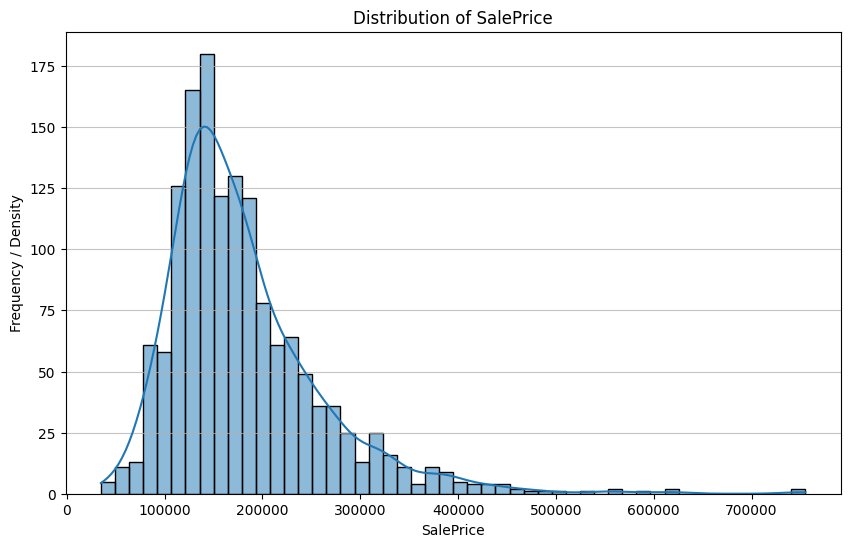

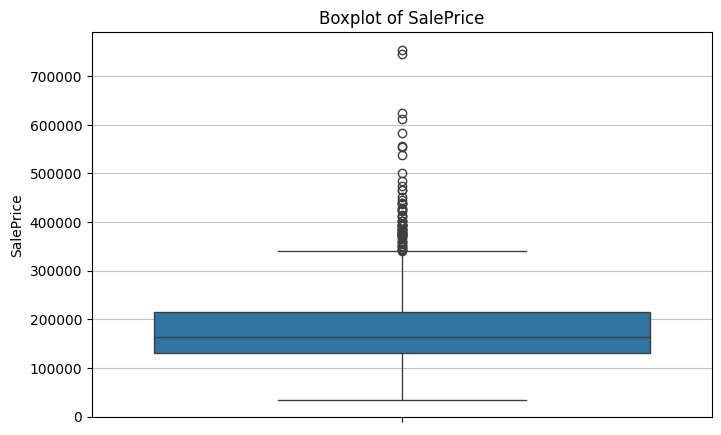

In [16]:
print("--- SalePrice Descriptive Statistics ---")
print(df_train['SalePrice'].describe())

mean_saleprice = df_train['SalePrice'].mean()
median_saleprice = df_train['SalePrice'].median()
std_saleprice = df_train['SalePrice'].std()
iqr_saleprice = df_train['SalePrice'].quantile(0.75) - df_train['SalePrice'].quantile(0.25)

print(f"\nMean SalePrice: {mean_saleprice:.2f}")
print(f"Median SalePrice: {median_saleprice:.2f}")
print(f"Standard Deviation of SalePrice: {std_saleprice:.2f}")
print(f"Interquartile Range (IQR) of SalePrice: {iqr_saleprice:.2f}")

# Plot a histogram and density plot for SalePrice distribution using Seaborn.
plt.figure(figsize=(10, 6))
sns.histplot(df_train['SalePrice'], kde=True, bins=50)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency / Density')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Plot a boxplot for SalePrice to visualize its distribution and outliers using Seaborn.
plt.figure(figsize=(8, 5))
sns.boxplot(y=df_train['SalePrice'])
plt.title('Boxplot of SalePrice')
plt.ylabel('SalePrice')
plt.grid(axis='y', alpha=0.75)
plt.show()


SalePrice has a mean of approximately $180,921.20 and a median of $163,000.00, suggesting a right-skewed distribution. The standard deviation is around $79,442.50, indicating considerable variability. Histograms and boxplots visually confirm this right-skewness and highlight the presence of several high-value outliers.

## 3. Examining Numerical Variables


--- Descriptive Statistics for Other Numerical Columns ---
        MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.2029

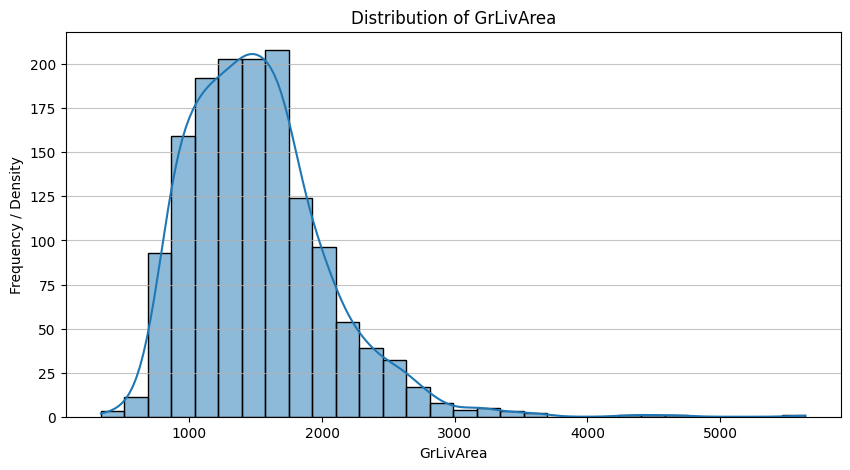

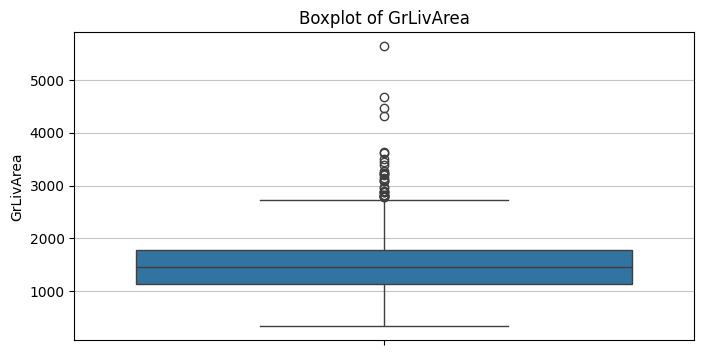


Processing column: GarageArea


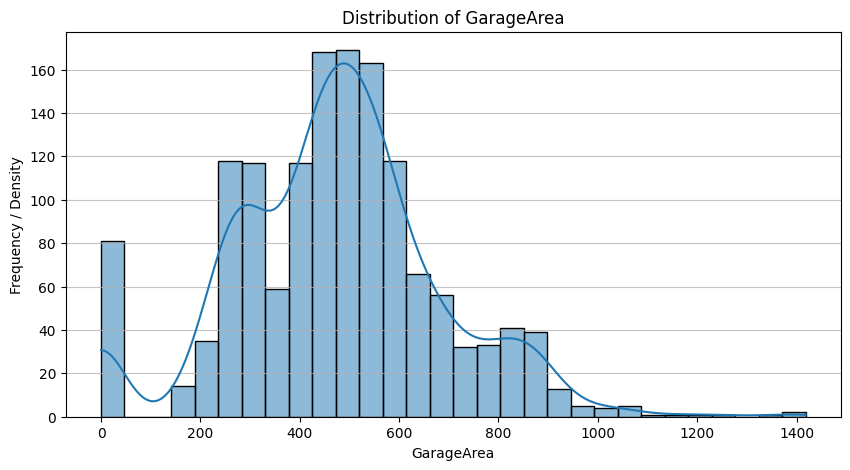

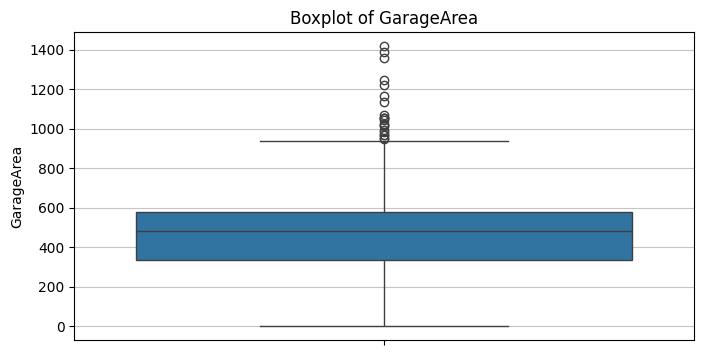


Processing column: TotalBsmtSF


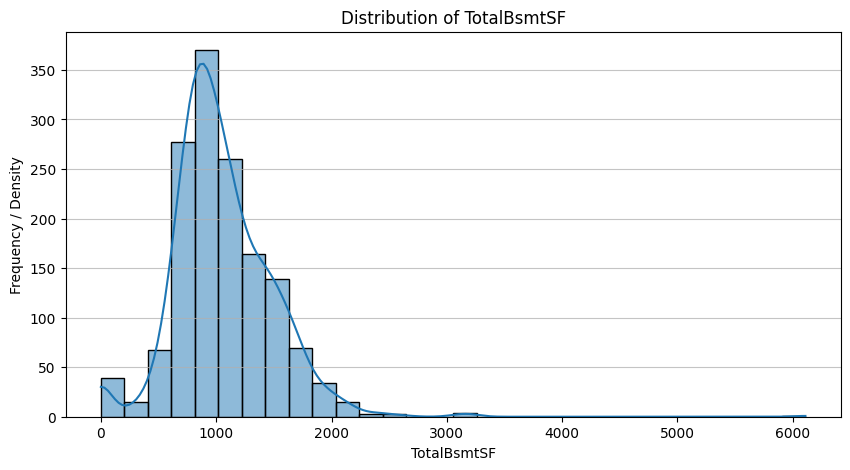

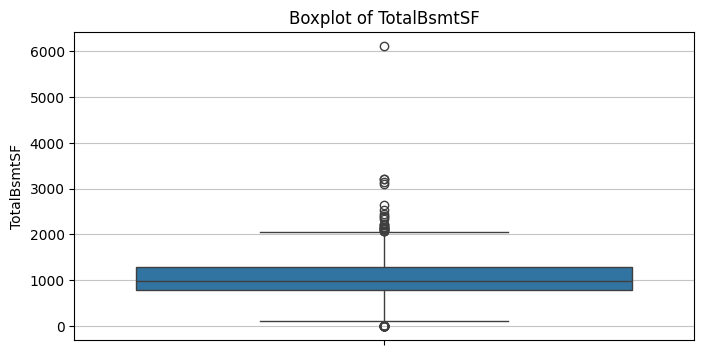


Processing column: 1stFlrSF


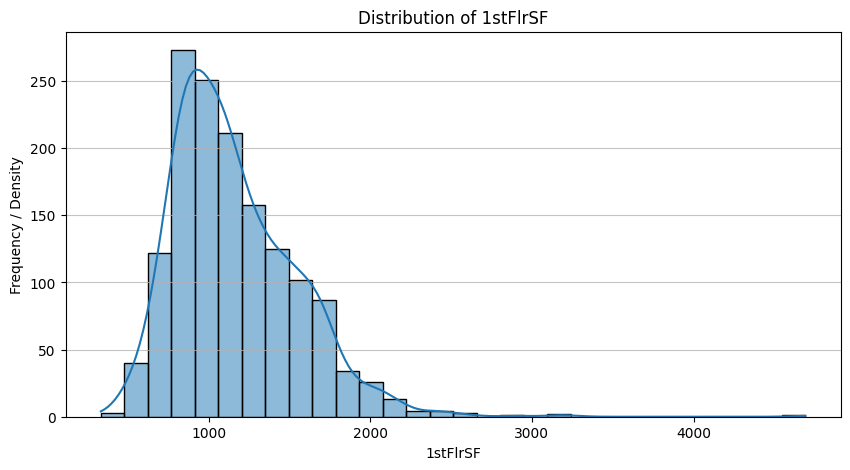

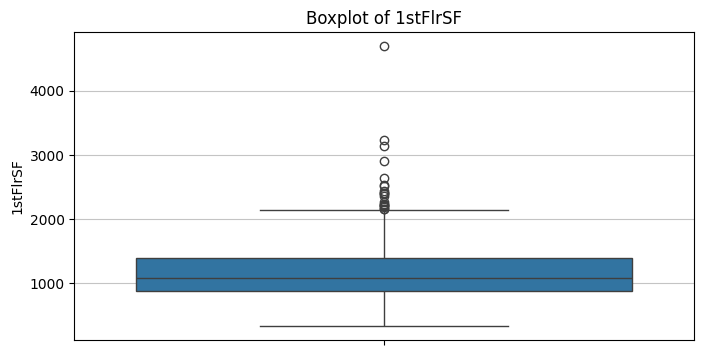


Processing column: FullBath


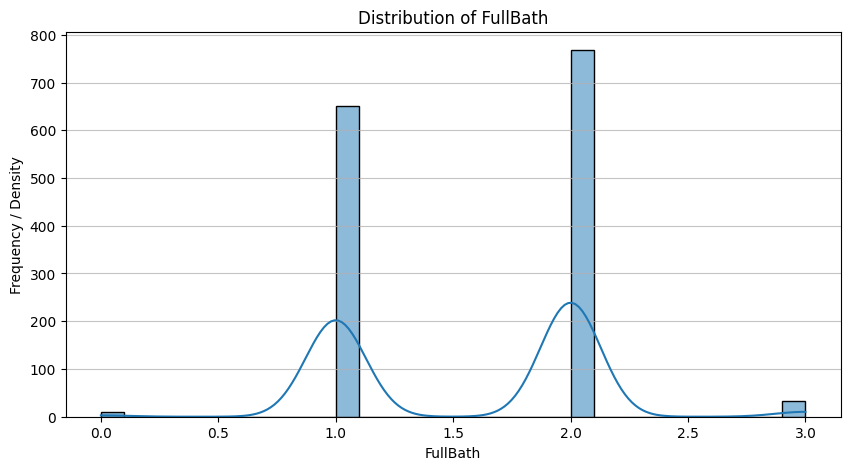

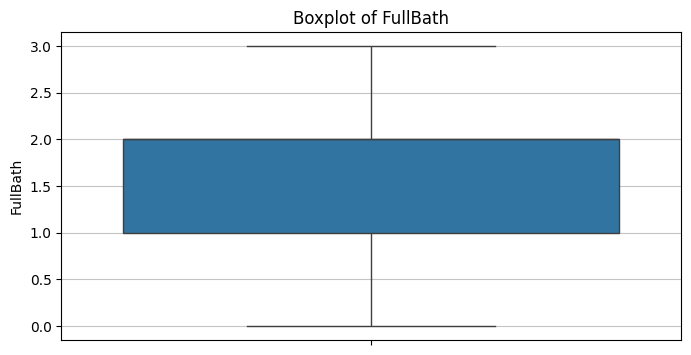


Processing column: YearBuilt


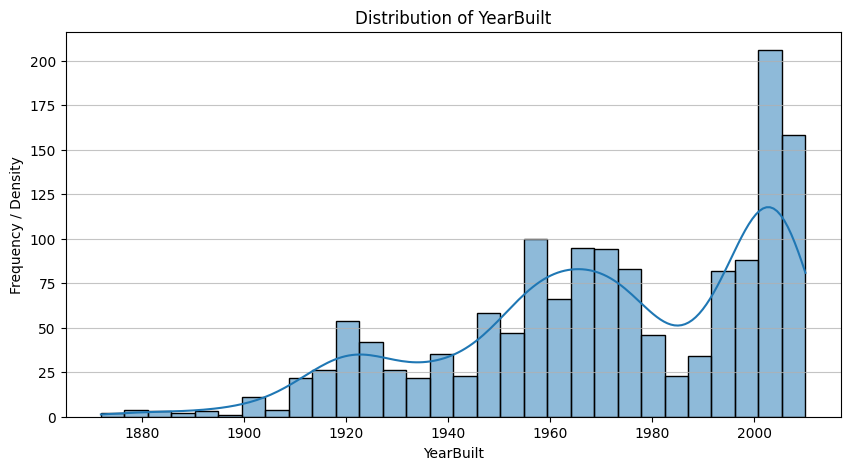

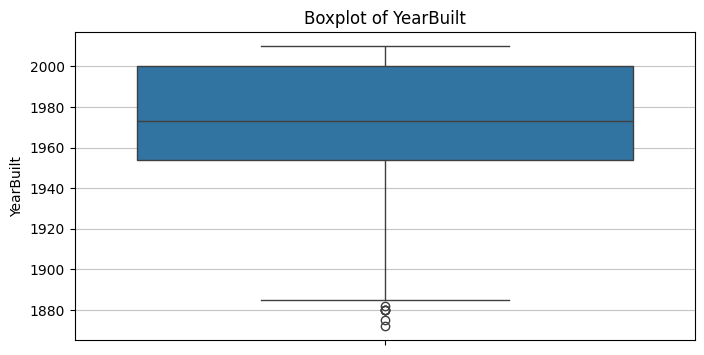


Processing column: OverallQual


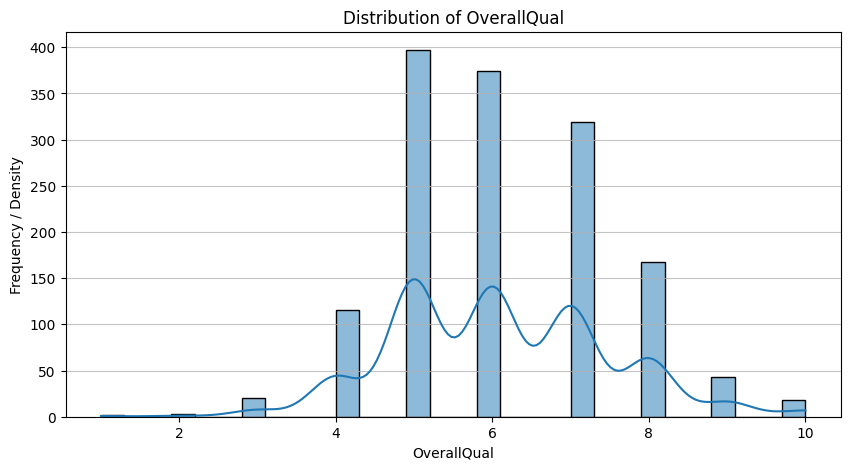

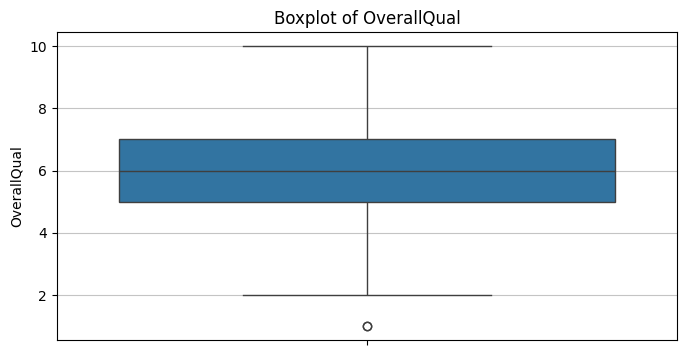

In [17]:
# Select numerical columns, excluding 'Id' and 'SalePrice'.
numerical_cols = df_train.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('Id')
numerical_cols.remove('SalePrice')

# Display descriptive statistics for selected numerical columns.
print("--- Descriptive Statistics for Other Numerical Columns ---")
print(df_train[numerical_cols].describe())

# Plot histograms and boxplots for a selection of important numerical columns.
selected_numerical_for_plot = [
    'GrLivArea',      # Above grade (ground) living area square feet
    'GarageArea',     # Size of garage in square feet
    'TotalBsmtSF',    # Total square feet of basement area
    '1stFlrSF',       # First Floor square feet
    'FullBath',       # Full bathrooms above grade
    'YearBuilt',      # Original construction date
    'OverallQual'     # Overall material and finish quality
]

print("\n--- Visualizing Distributions of Selected Numerical Variables ---")

for col in selected_numerical_for_plot:
    print(f"\nProcessing column: {col}")

    # Plot Histogram with KDE
    plt.figure(figsize=(10, 5))
    sns.histplot(df_train[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency / Density')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    # Plot Boxplot
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=df_train[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.grid(axis='y', alpha=0.75)
    plt.show()


Numerical features like GrLivArea, GarageArea, and TotalBsmtSF show varying distributions, with many exhibiting right-skewness and outliers. YearBuilt indicates the construction year range, while OverallQual (treated as numerical here) spans from 1 to 10, showing its quality scale. These variables represent key physical attributes of the houses.

## 4. Examining Categorical Variables


--- Visualizing Distributions of Selected Categorical Variables ---

Processing column: MSZoning
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

Percentage of each category in MSZoning:
MSZoning
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: proportion, dtype: float64


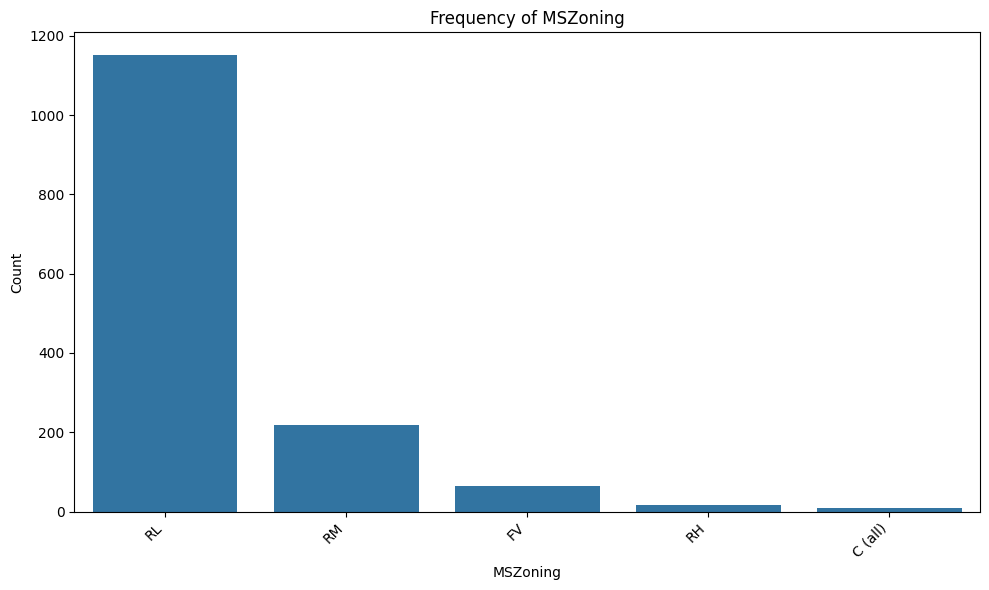


Processing column: Neighborhood
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

Percentage of each category in Neighborhood:
Neighborhood
NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.972603
Crawfor     3.493151
Mitchel     3.356164
NoRidge     2.808219
Timber      2.602740
IDOTRR      2.534247
ClearCr     1.917808
SWISU       1.712329
StoneBr     1.712329
Blmngtn     1.164384
MeadowV     1.164384
BrDale      1.095890
Veenker     0.753425
NPkVill    

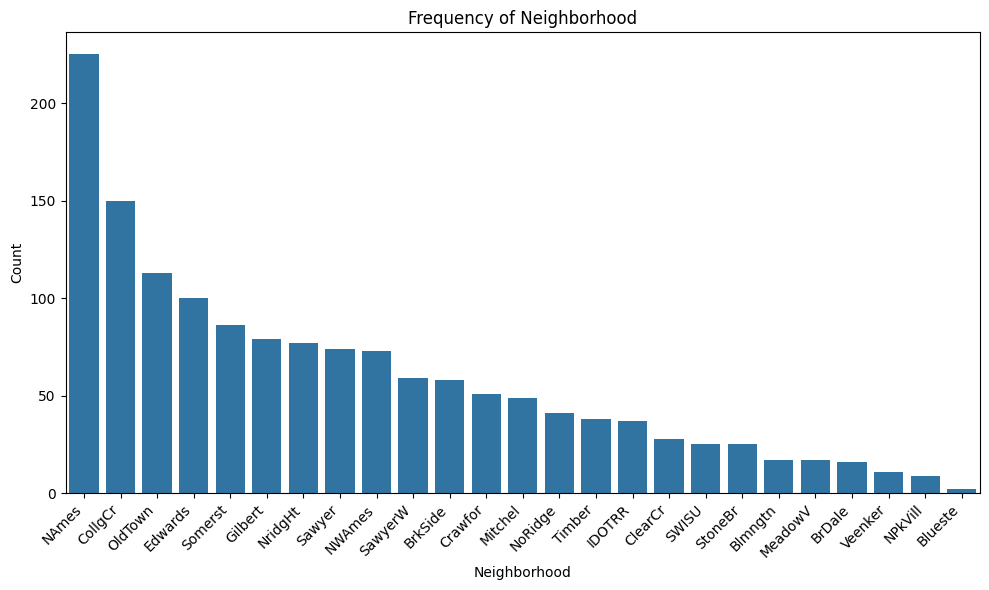


Processing column: HouseStyle
HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

Percentage of each category in HouseStyle:
HouseStyle
1Story    49.726027
2Story    30.479452
1.5Fin    10.547945
SLvl       4.452055
SFoyer     2.534247
1.5Unf     0.958904
2.5Unf     0.753425
2.5Fin     0.547945
Name: proportion, dtype: float64


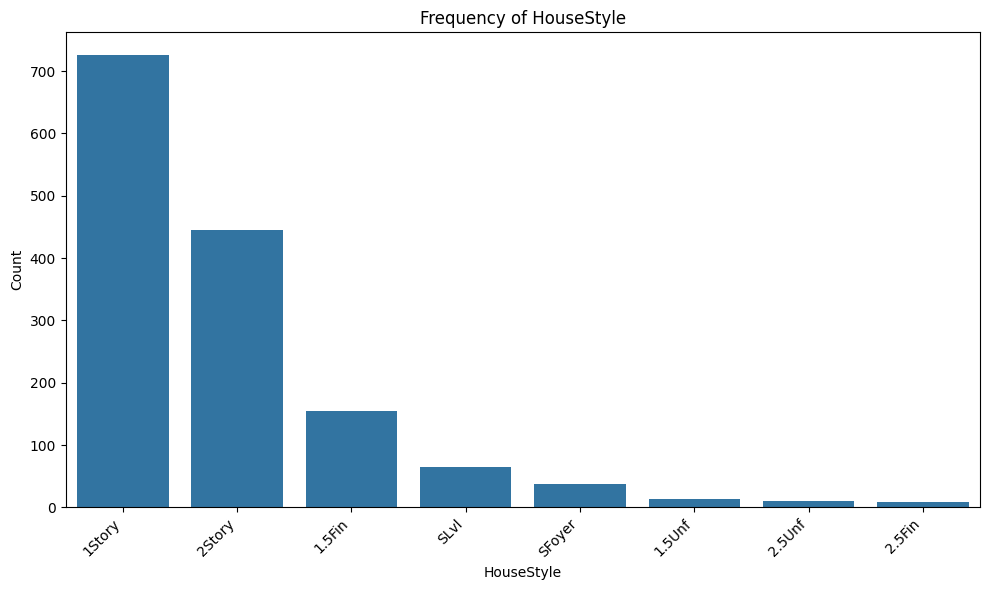


Processing column: OverallQual
OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64

Percentage of each category in OverallQual:
OverallQual
5     27.191781
6     25.616438
7     21.849315
8     11.506849
4      7.945205
9      2.945205
3      1.369863
10     1.232877
2      0.205479
1      0.136986
Name: proportion, dtype: float64


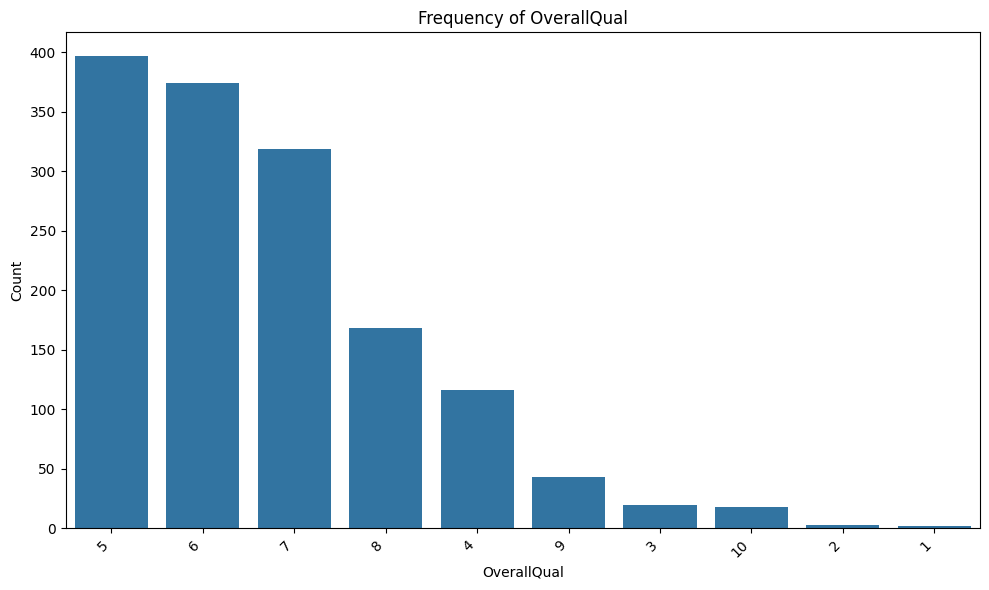


Processing column: ExterQual
ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

Percentage of each category in ExterQual:
ExterQual
TA    62.054795
Gd    33.424658
Ex     3.561644
Fa     0.958904
Name: proportion, dtype: float64


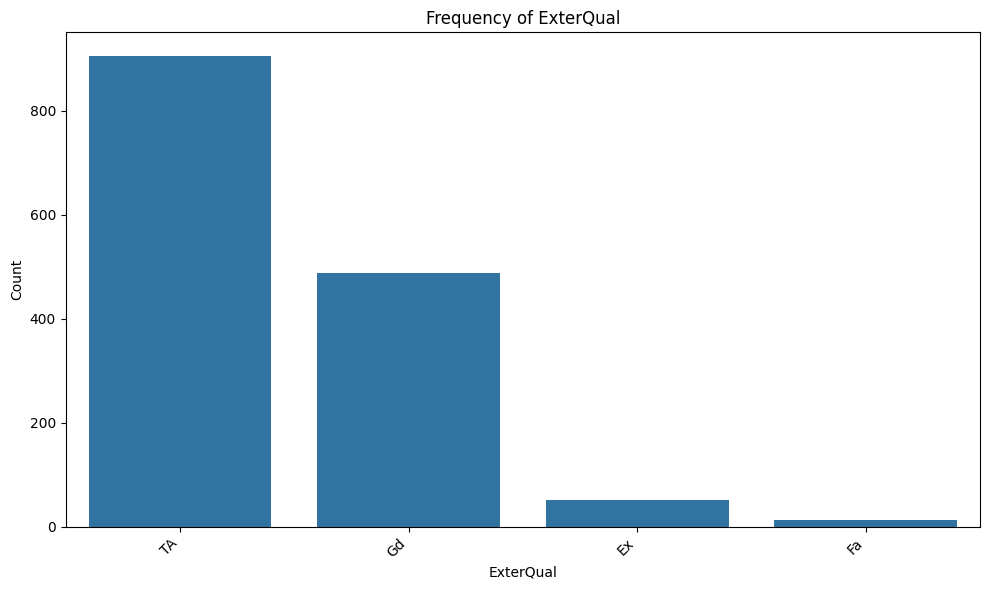


Processing column: KitchenQual
KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64

Percentage of each category in KitchenQual:
KitchenQual
TA    50.342466
Gd    40.136986
Ex     6.849315
Fa     2.671233
Name: proportion, dtype: float64


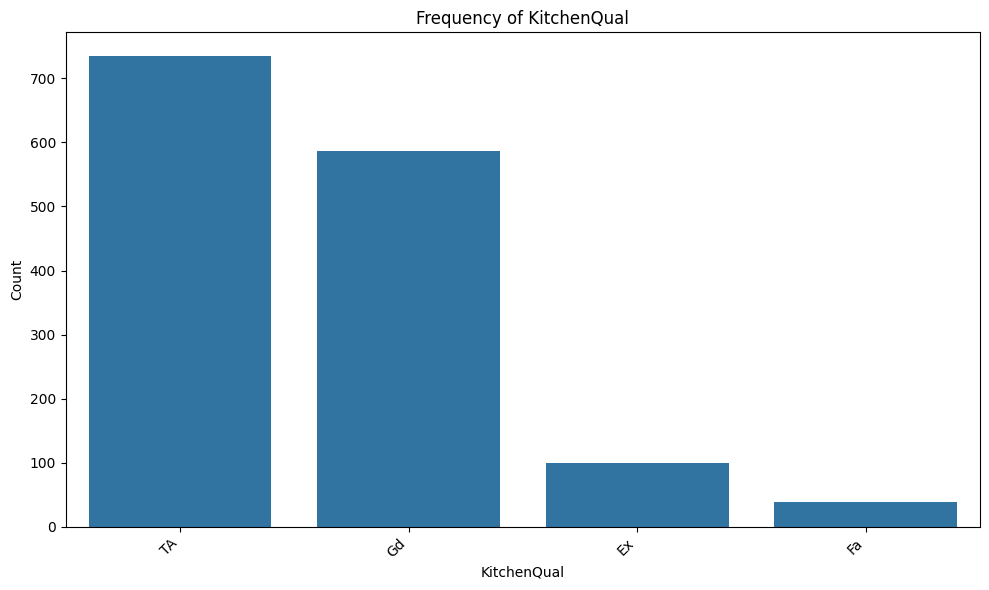

Column '' not found in DataFrame. Skipping.


In [18]:
# Select categorical columns from the DataFrame.
categorical_cols = df_train.select_dtypes(include='object').columns.tolist()

# Display value counts and plot bar charts for a selection of important categorical columns.
selected_categorical_for_plot = [
    'MSZoning',       # General zoning classification
    'Neighborhood',   # Physical locations within Ames city limits
    'HouseStyle',     # Style of dwelling
    'OverallQual',    # Overall material and finish quality (treated as categorical here for some aspects)
    'ExterQual',      # Exterior material quality
    'KitchenQual',    # Kitchen quality
    ''
]

print("--- Visualizing Distributions of Selected Categorical Variables ---")

for col in selected_categorical_for_plot:
    if col in df_train.columns:
        print(f"\nProcessing column: {col}")

        # Display value counts (frequency table)
        print(df_train[col].value_counts())
        print(f"\nPercentage of each category in {col}:")
        print(df_train[col].value_counts(normalize=True) * 100)

        # Plot Bar Chart for frequencies
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index)
        plt.title(f'Frequency of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
        plt.tight_layout() # Adjust layout to prevent labels from overlapping
        plt.show()
    else:
        print(f"Column '{col}' not found in DataFrame. Skipping.")



Categorical variables like MSZoning, Neighborhood, and HouseStyle reveal the distribution of properties across different categories. Neighborhood shows a wide range of categories with varying frequencies, indicating diverse geographical locations. OverallQual, ExterQual, and KitchenQual (when treated as categorical) highlight the distribution of quality ratings, with certain quality levels being more common.

## 5. Examining Correlation Between Numerical Variables


--- Correlation Matrix of Numerical Variables (first 5x5 if many) ---
             MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass     1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage   -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea       -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual    0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond   -0.059316    -0.059213 -0.005636    -0.091932     1.000000   

             YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  \
MSSubClass    0.027850      0.040581    0.022936   -0.069836   -0.065649  ...   
LotFrontage   0.123349      0.088866    0.193458    0.233633    0.049900  ...   
LotArea       0.014228      0.013788    0.104160    0.214103    0.111170  ...   
OverallQual   0.572323      0.550684    0.411876    0.239666   -0.059119  ...   
OverallCond  -0.375983      0.073741   -0.128101   -0.046231    0.04

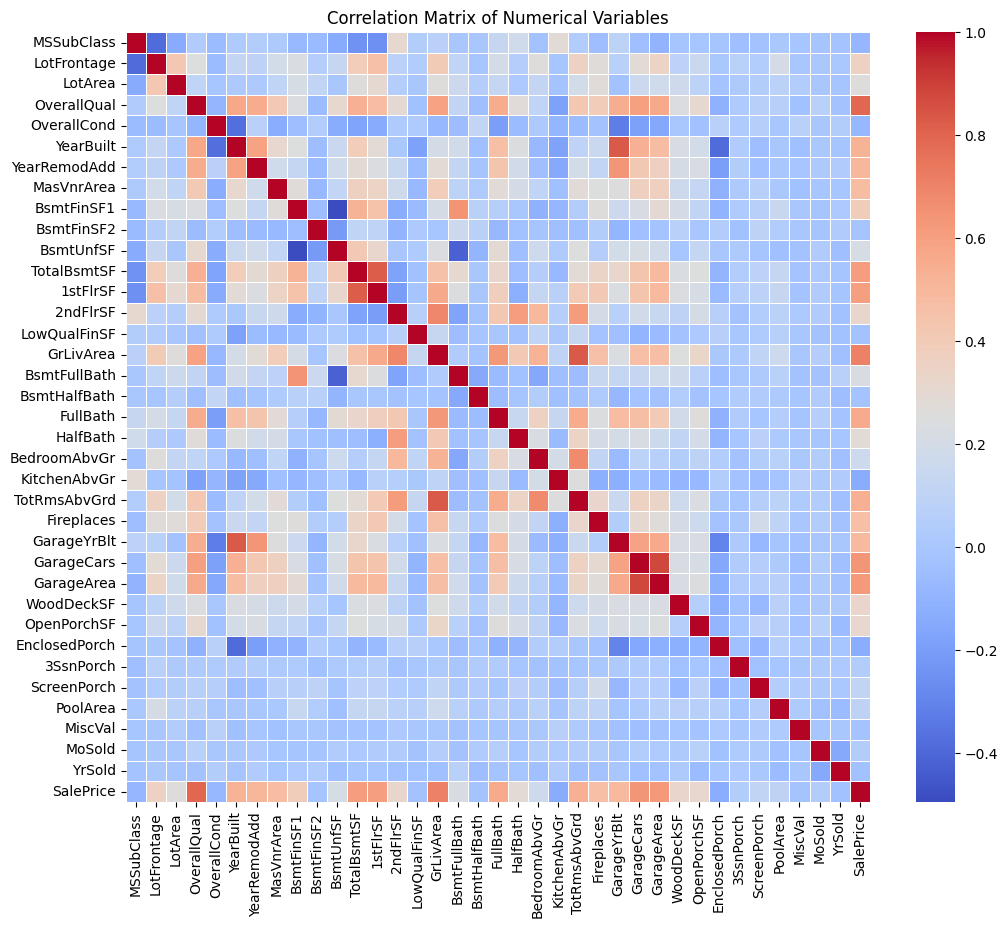


--- Correlation of Numerical Variables with SalePrice ---
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
Kitch

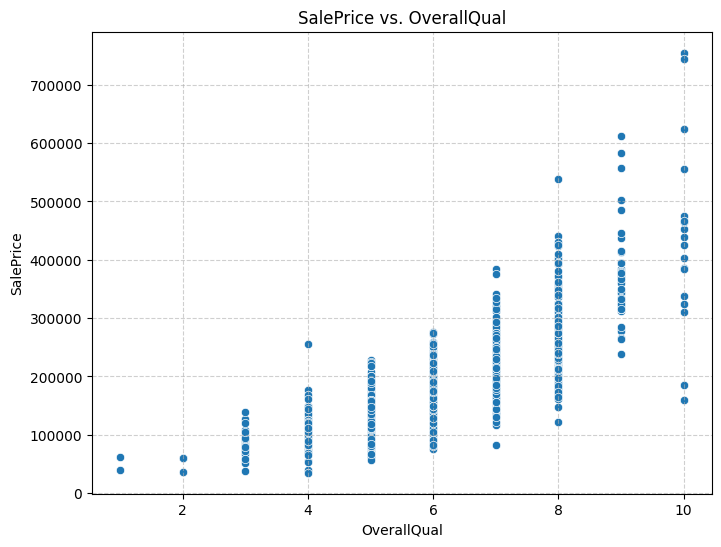

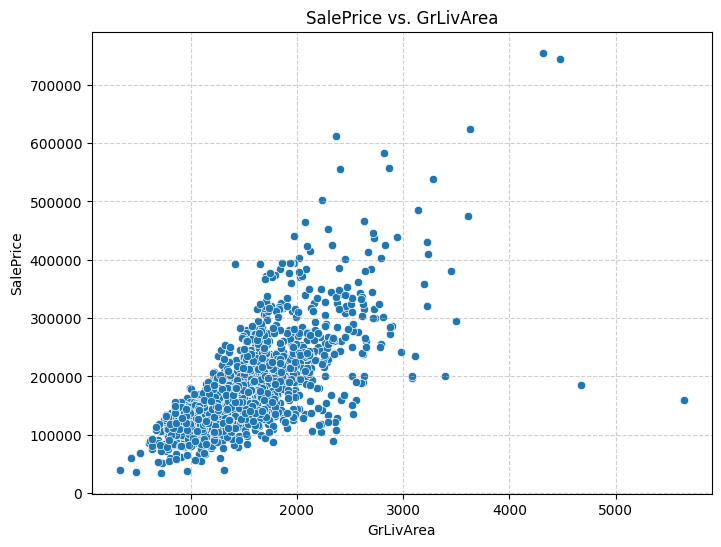

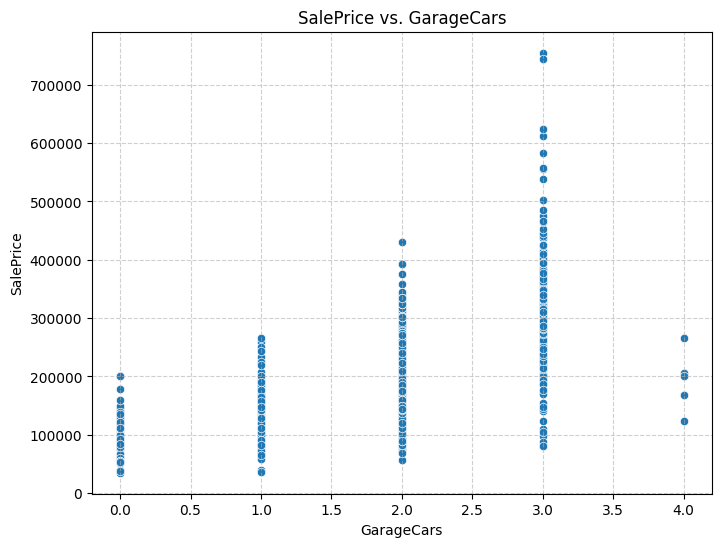

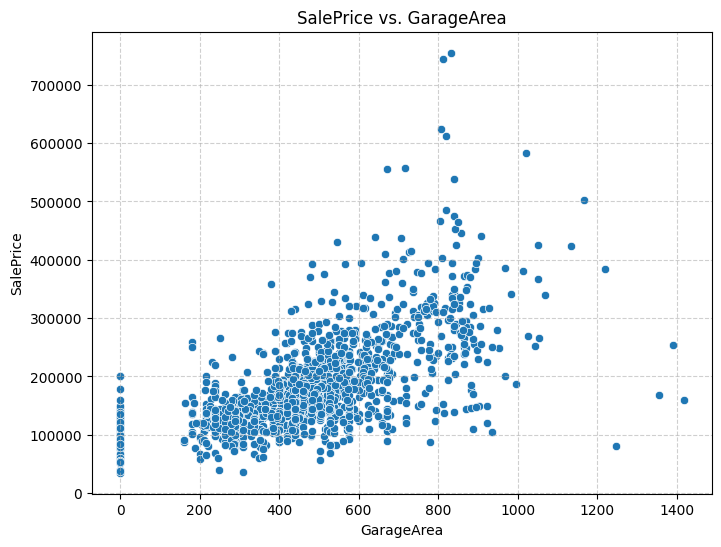

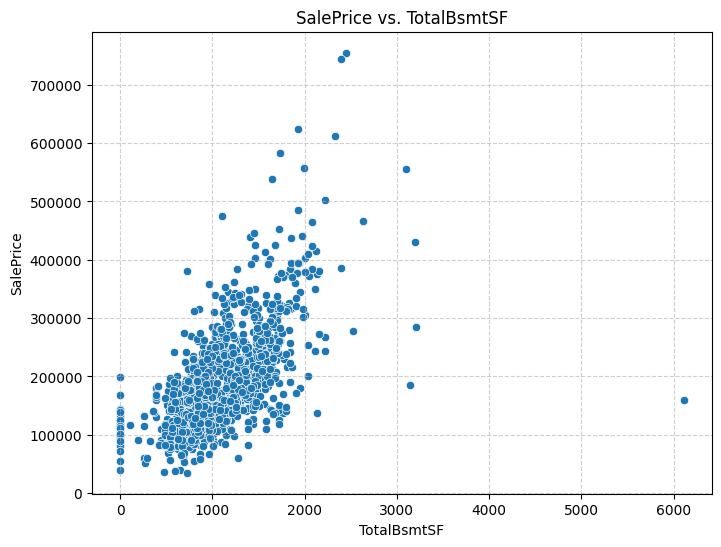


--- Hexagonal Binning Plot for GrLivArea vs SalePrice (if dense) ---


<Figure size 1000x800 with 0 Axes>

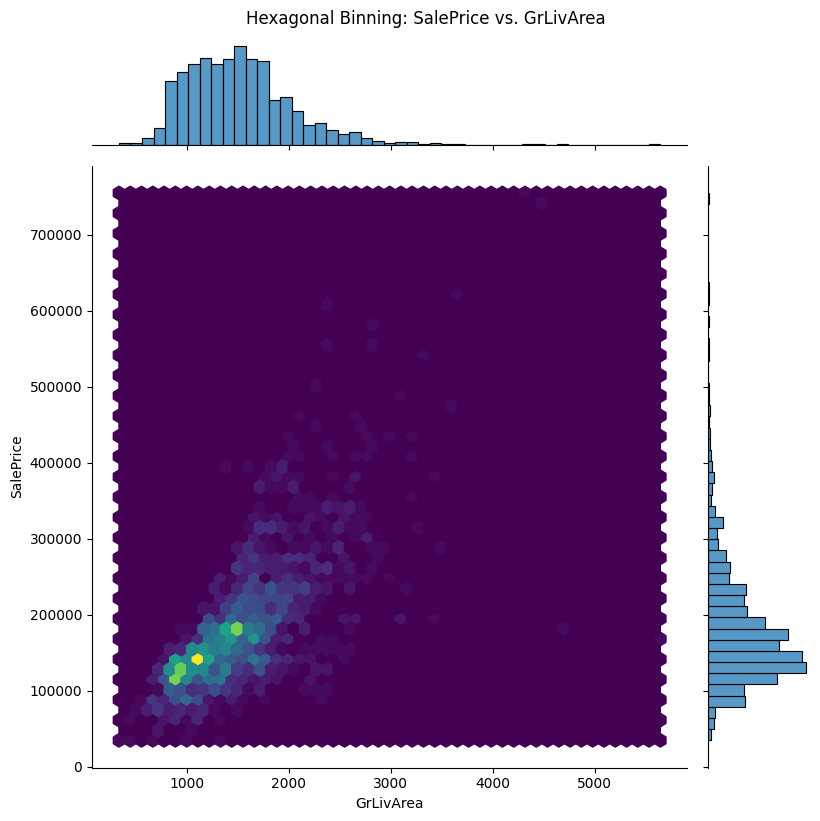

In [19]:
numerical_cols_for_corr = df_train.select_dtypes(include=np.number).columns.tolist()
if 'Id' in numerical_cols_for_corr:
    numerical_cols_for_corr.remove('Id')

correlation_matrix = df_train[numerical_cols_for_corr].corr()

print("--- Correlation Matrix of Numerical Variables (first 5x5 if many) ---")
print(correlation_matrix.head())

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Focus on correlations with the target variable 'SalePrice'.
print("\n--- Correlation of Numerical Variables with SalePrice ---")
print(correlation_matrix['SalePrice'].sort_values(ascending=False))

# Plot scatterplots for top correlated features with SalePrice.
top_correlated_features = correlation_matrix['SalePrice'].sort_values(ascending=False).index[1:6].tolist()

print(f"\n--- Scatterplots of Top Correlated Features with SalePrice ({top_correlated_features}) ---")
for col in top_correlated_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_train, x=col, y='SalePrice')
    plt.title(f'SalePrice vs. {col}')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Example of Hexagonal Binning for highly dense scatterplots (e.g., GrLivArea vs SalePrice)
print(f"\n--- Hexagonal Binning Plot for GrLivArea vs SalePrice (if dense) ---")
plt.figure(figsize=(10, 8))
sns.jointplot(data=df_train, x='GrLivArea', y='SalePrice', kind='hex', height=8, cmap='viridis')
plt.suptitle('Hexagonal Binning: SalePrice vs. GrLivArea', y=1.02) # Adjust suptitle position
plt.show()


The correlation matrix shows varying degrees of linear relationships among numerical features. GrLivArea, GarageArea, TotalBsmtSF, and OverallQual exhibit strong positive correlations with SalePrice. Heatmaps provide a clear visual representation of these relationships, indicating which features move together and which are most influential for predicting house prices.

## 6. Examining Relationship Between Categorical Variables and SalePrice


--- Visualizing Relationship Between Selected Categorical Variables and SalePrice ---

Processing relationship for: OverallQual vs SalePrice


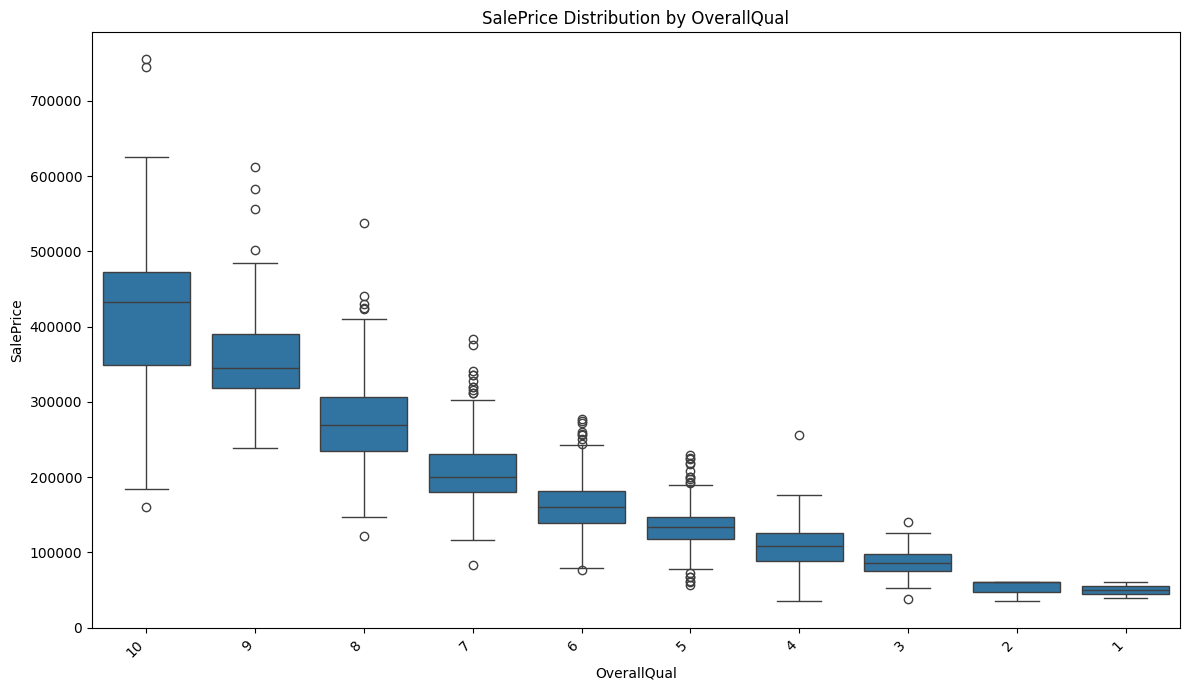

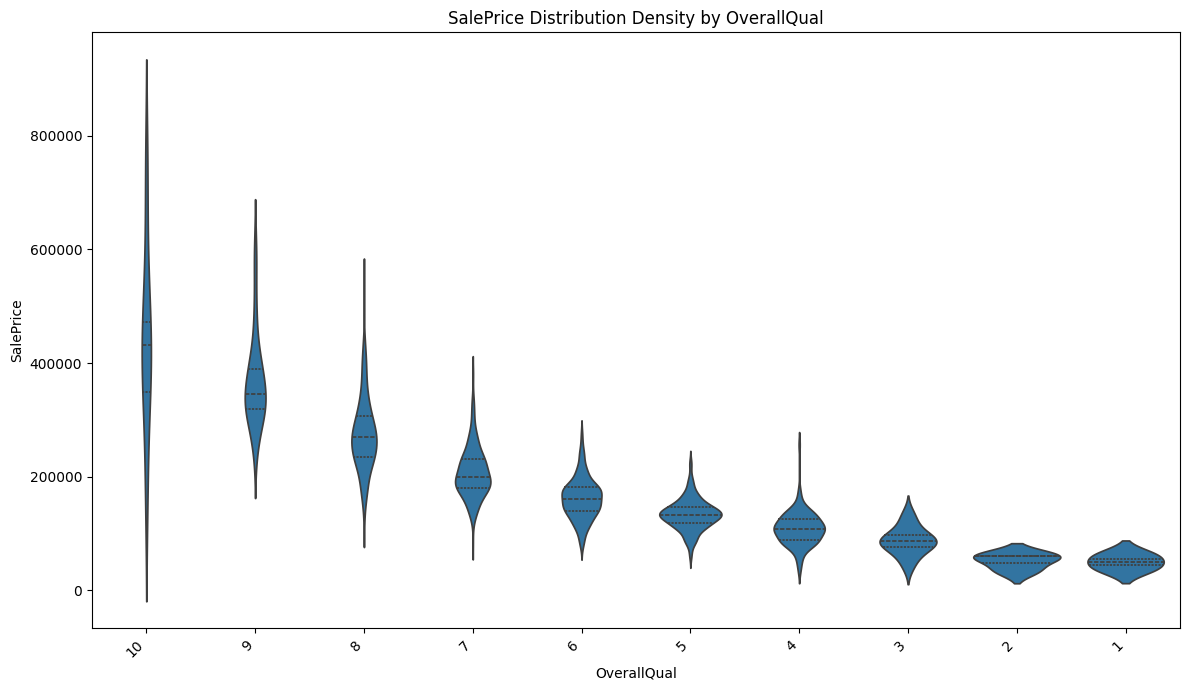


Processing relationship for: Neighborhood vs SalePrice


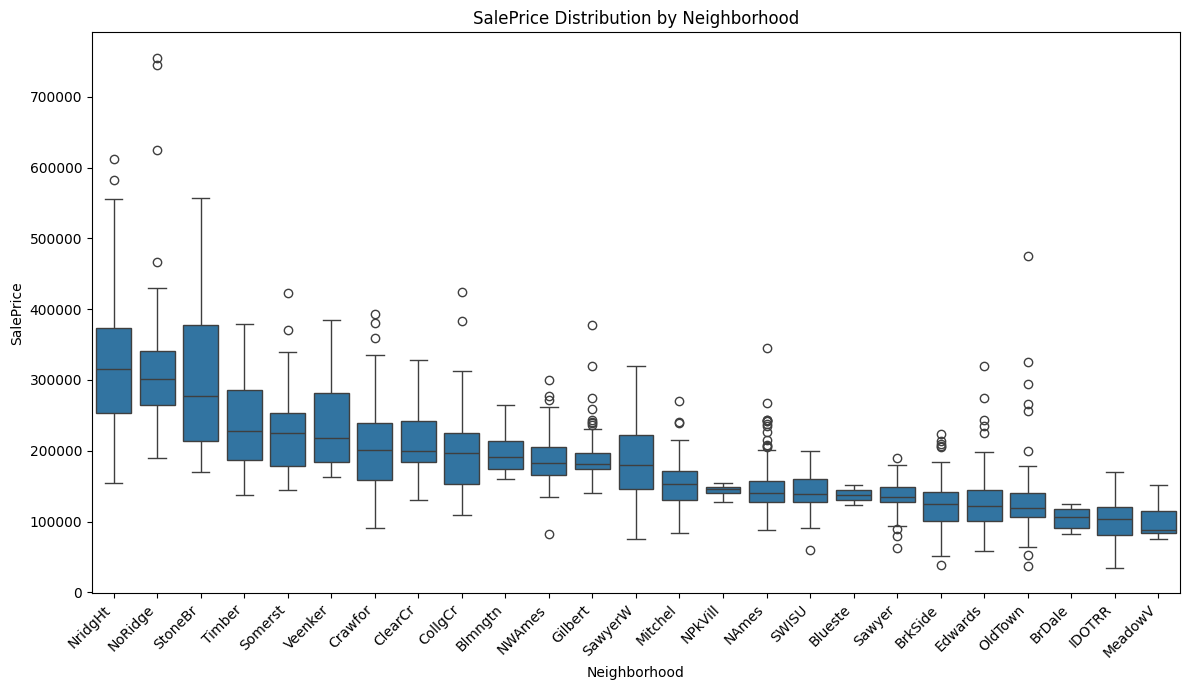

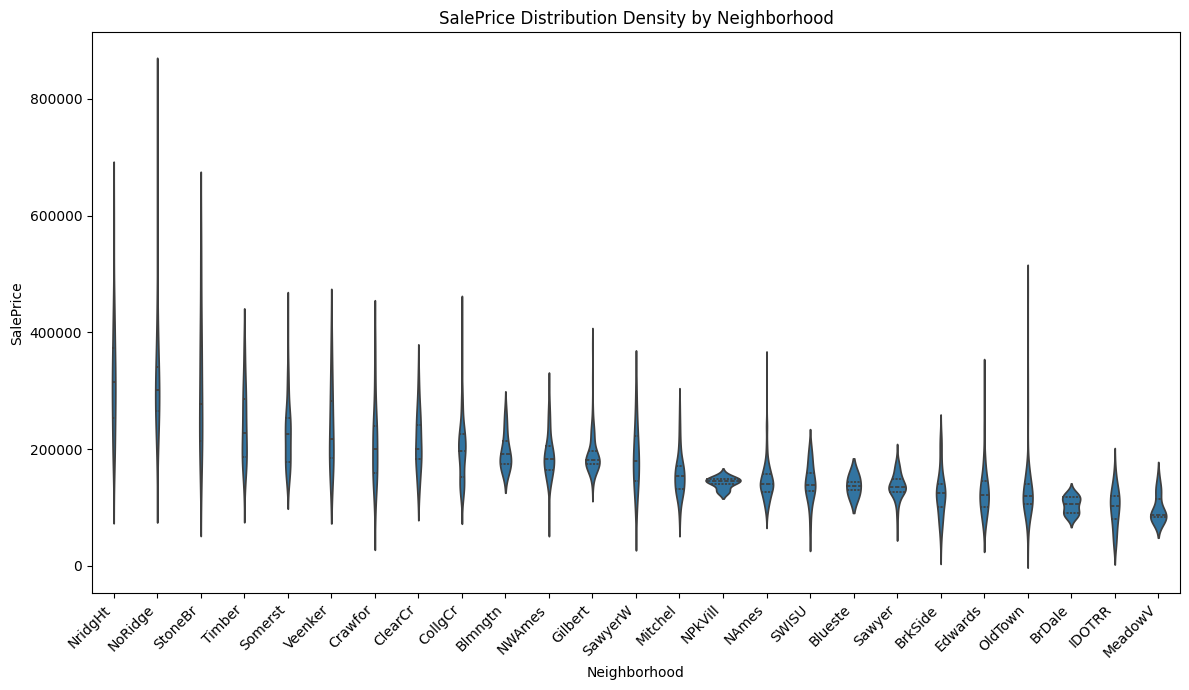


Processing relationship for: MSZoning vs SalePrice


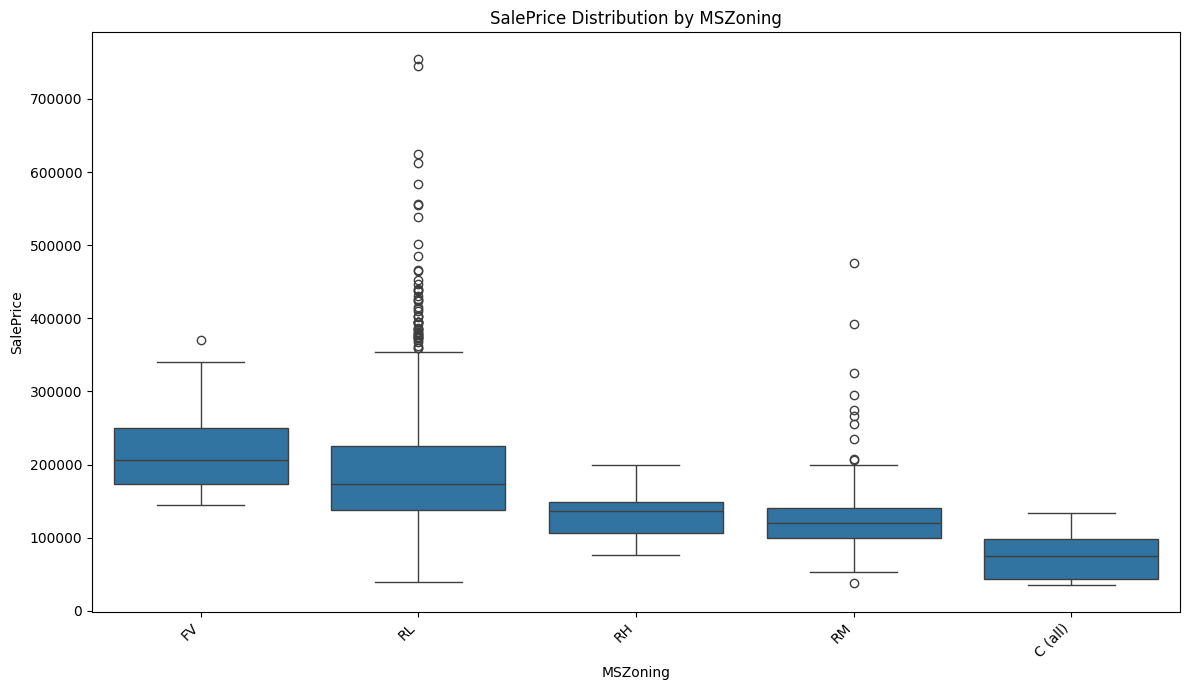

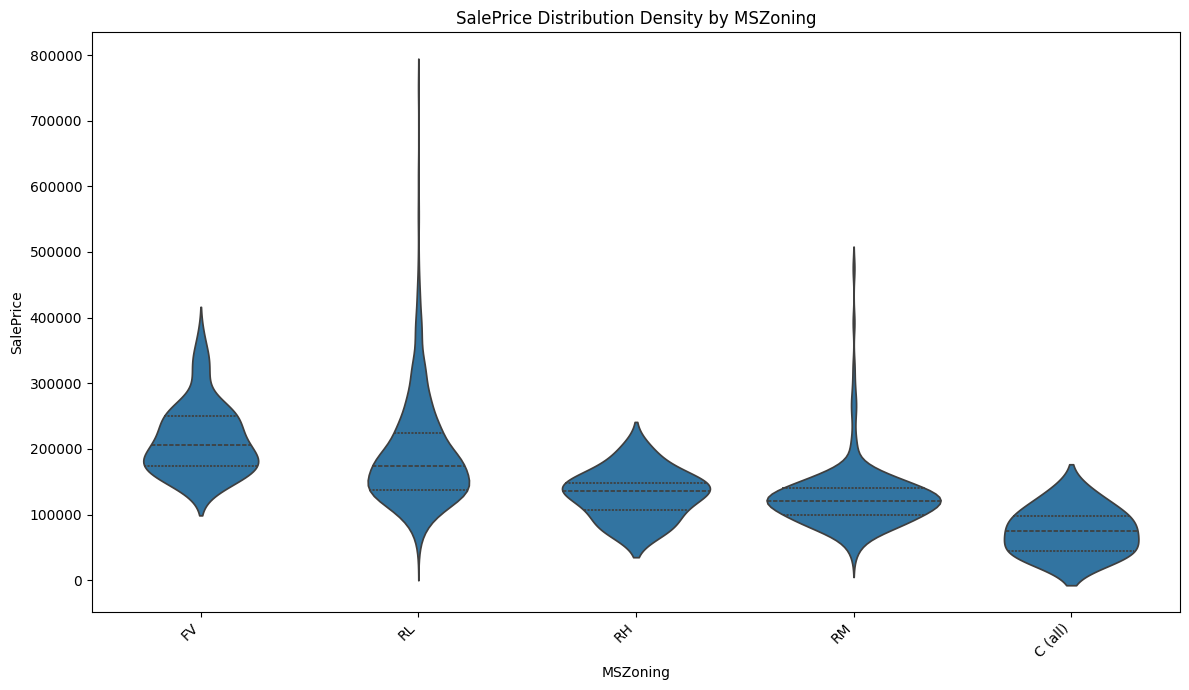


Processing relationship for: HouseStyle vs SalePrice


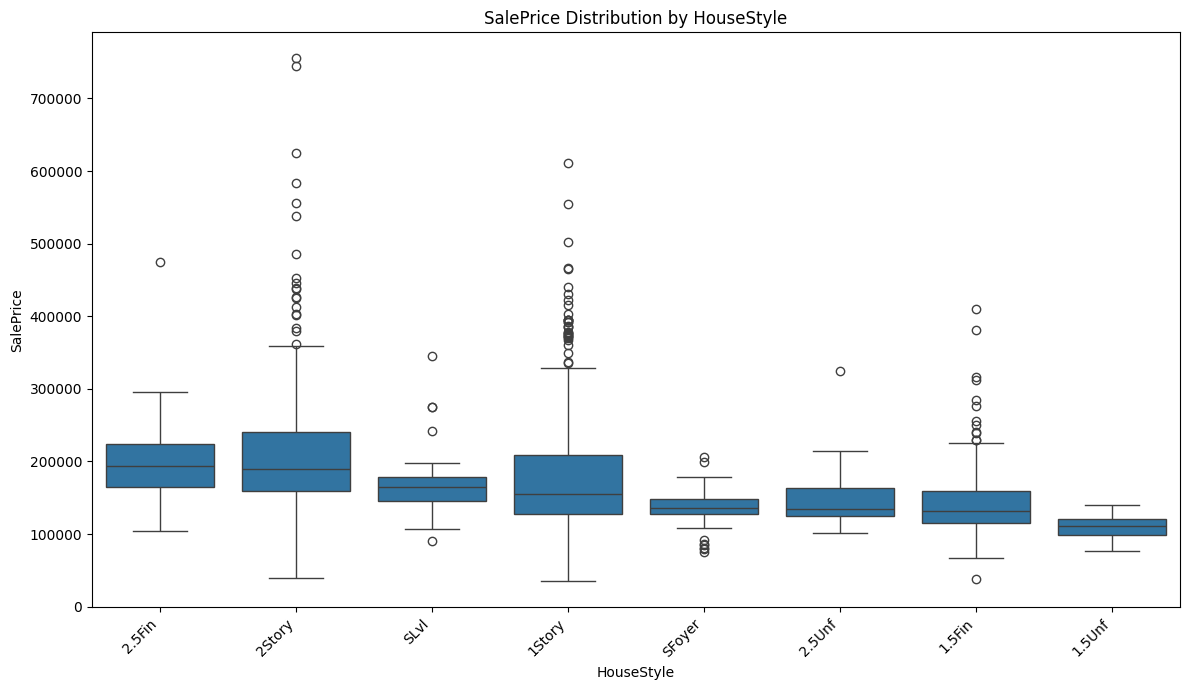

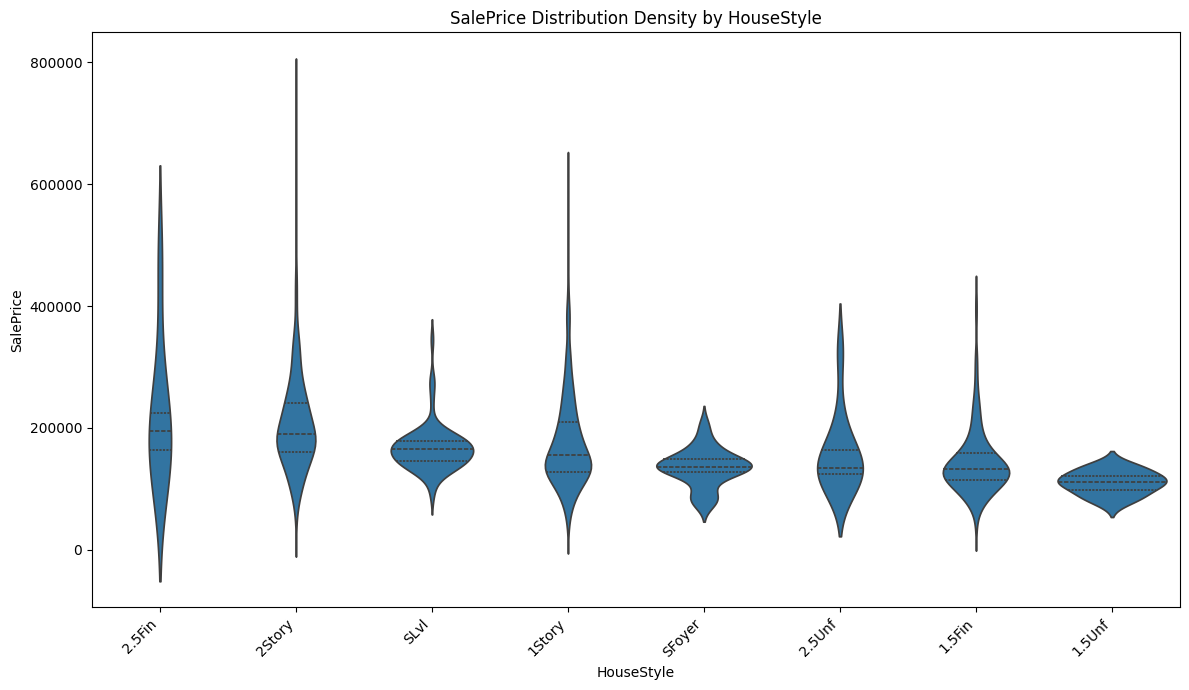


Processing relationship for: ExterQual vs SalePrice


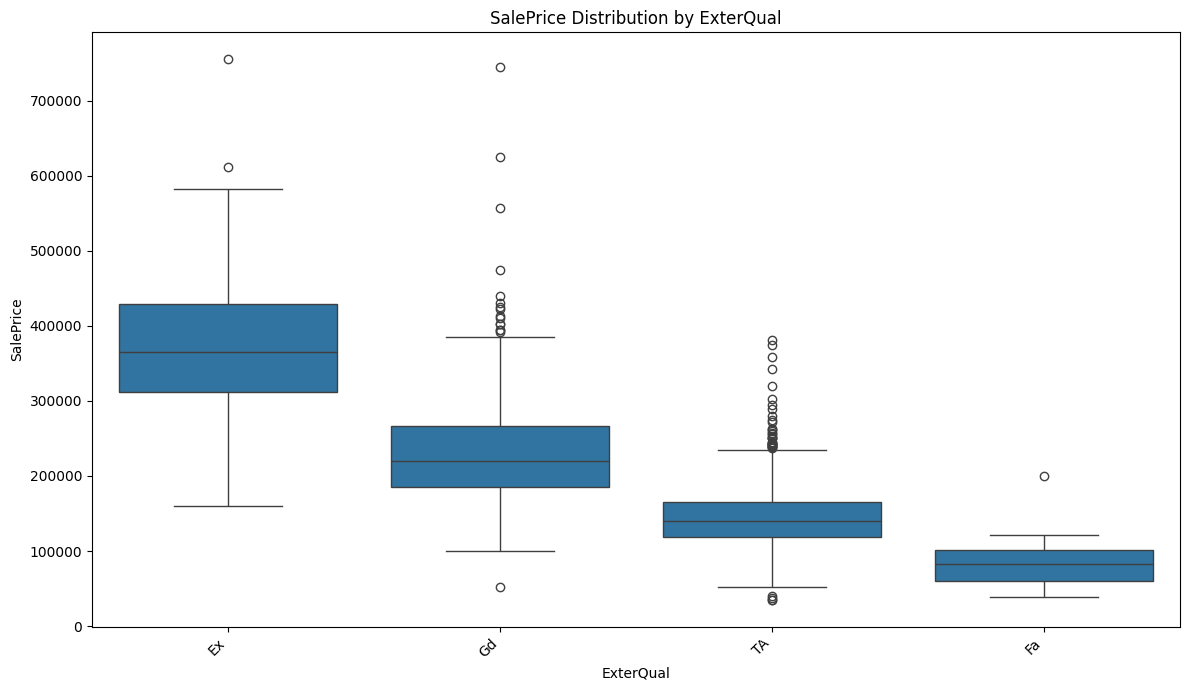

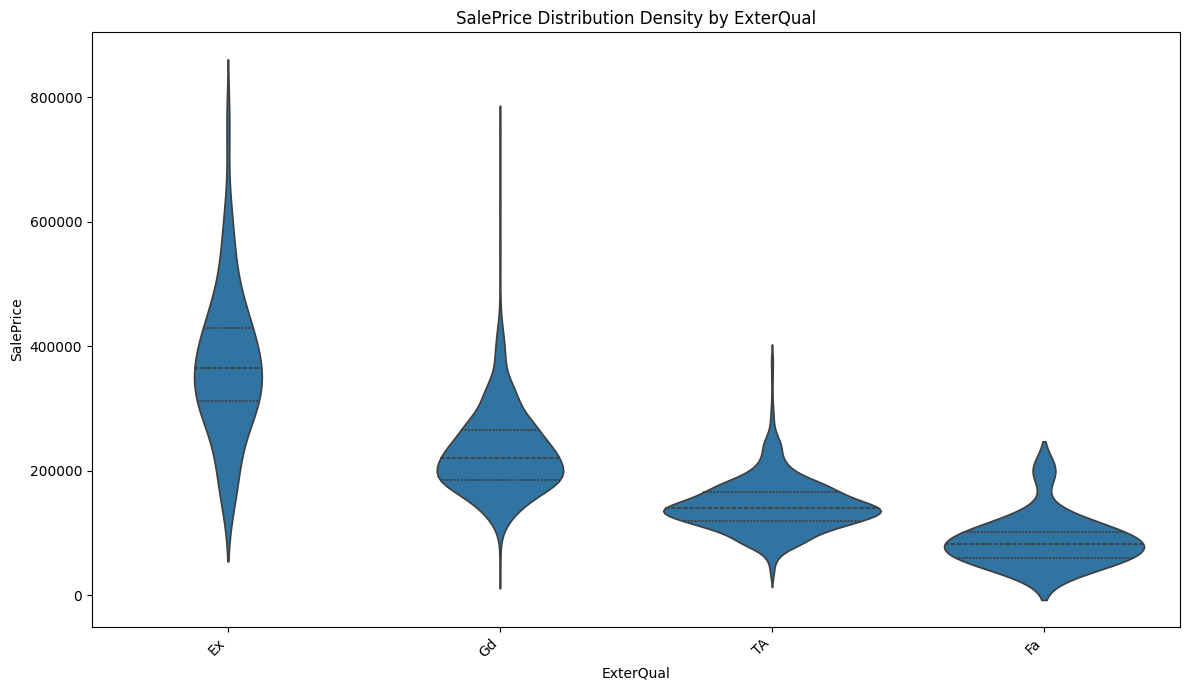


Processing relationship for: KitchenQual vs SalePrice


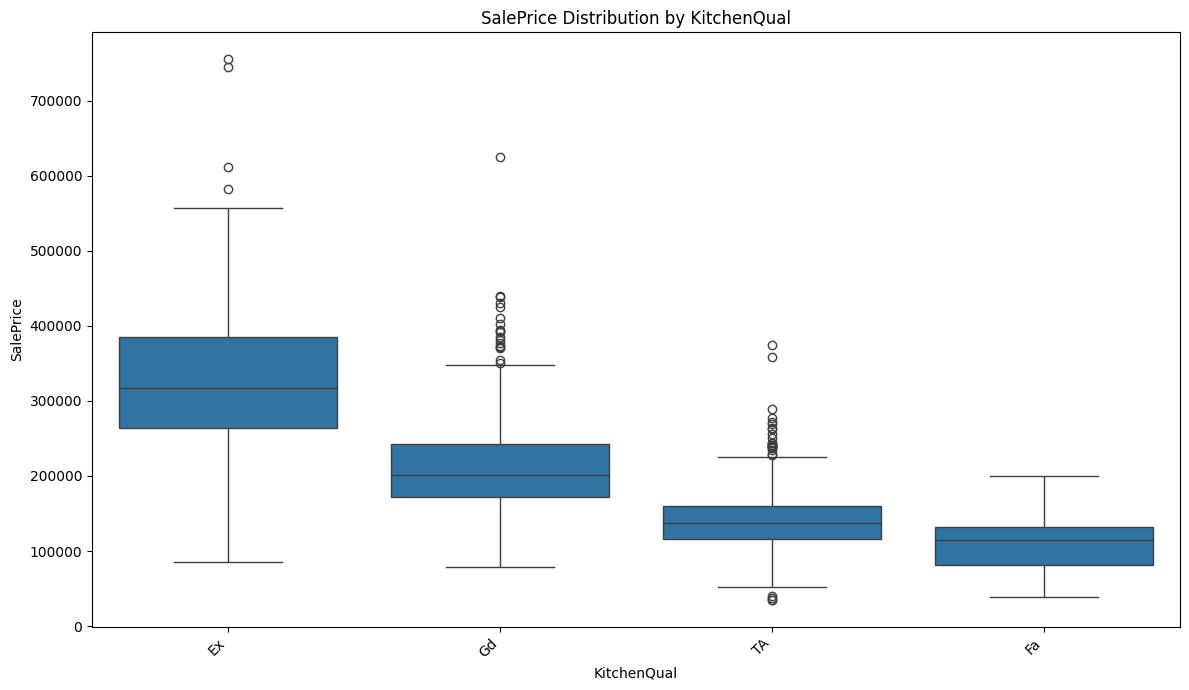

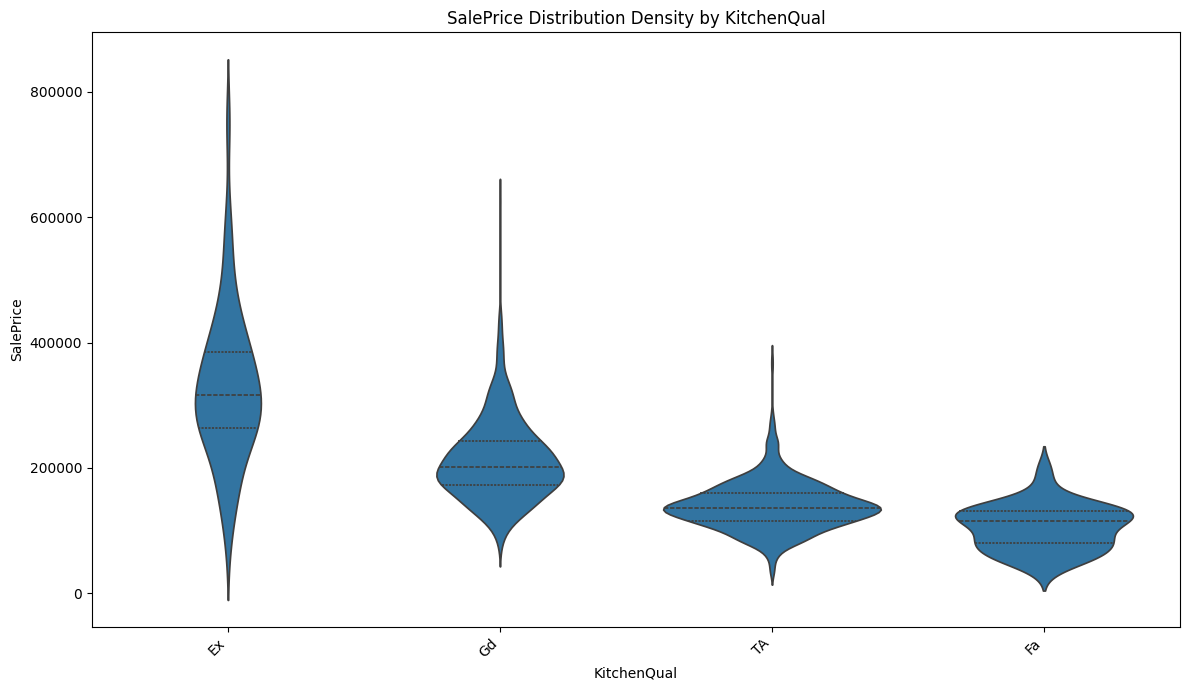

In [20]:
categorical_cols_for_rel = df_train.select_dtypes(include='object').columns.tolist()

if 'OverallQual' not in categorical_cols_for_rel:
    categorical_cols_for_rel.append('OverallQual')

# Select a few key categorical features to visualize their relationship with SalePrice.
selected_categorical_for_plot_vs_target = [
    'OverallQual',    # Overall material and finish quality
    'Neighborhood',   # Physical locations within Ames city limits
    'MSZoning',       # General zoning classification
    'HouseStyle',     # Style of dwelling
    'ExterQual',      # Exterior material quality
    'KitchenQual'     # Kitchen quality
]

print("--- Visualizing Relationship Between Selected Categorical Variables and SalePrice ---")

for col in selected_categorical_for_plot_vs_target:
    if col in df_train.columns:
        print(f"\nProcessing relationship for: {col} vs SalePrice")

        # Plot Boxplot to compare SalePrice distribution across categories.
        plt.figure(figsize=(12, 7))
        sns.boxplot(data=df_train, x=col, y='SalePrice', order=df_train.groupby(col)['SalePrice'].median().sort_values(ascending=False).index)
        plt.title(f'SalePrice Distribution by {col}')
        plt.xlabel(col)
        plt.ylabel('SalePrice')
        plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
        plt.tight_layout() # Adjust layout
        plt.show()

        # Plot Violin Plot for a more detailed view of SalePrice distribution across categories.
        plt.figure(figsize=(12, 7))
        sns.violinplot(data=df_train, x=col, y='SalePrice', inner='quartile', order=df_train.groupby(col)['SalePrice'].median().sort_values(ascending=False).index)
        plt.title(f'SalePrice Distribution Density by {col}')
        plt.xlabel(col)
        plt.ylabel('SalePrice')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{col}' not found in DataFrame. Skipping.")



Boxplots and violin plots effectively demonstrate how SalePrice distributions vary across different categories of features like OverallQual, Neighborhood, and ExterQual. For instance, higher OverallQual categories consistently show higher median SalePrice and narrower price ranges, indicating a strong positive relationship between perceived quality and selling price. Neighborhood also shows distinct price distributions, highlighting the impact of location.